In [1]:
import random
import numpy as np
import pandas as pd
from numpy.random import rand
from numpy.random import randint
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
df.shape

(10000, 50)

In [4]:
print(df.isna().sum())

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [6]:
X = df.drop(['id', 'CLASS_LABEL'], axis = 1)
Y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)


In [7]:
print(df['CLASS_LABEL'].value_counts(), '\n')

outcome_mapping = {0: 'Website Normal', 1: 'Website Phising'}

df['CLASS_LABEL'] = df['CLASS_LABEL'].map(outcome_mapping)

print(df['CLASS_LABEL'].value_counts())

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64 

CLASS_LABEL
Website Phising    5000
Website Normal     5000
Name: count, dtype: int64


In [8]:
kelas = df['CLASS_LABEL'].unique().tolist()
kelas

['Website Phising', 'Website Normal']

In [9]:
X

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,0,1,1,-1,1,0,1
9996,2,1,4,59,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
9998,3,1,1,49,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1


In [10]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

# **SVM 60/40**

In [11]:
i = 0
header_written = False

while i < 100:
  # Parameter SVM
  c = random.randint(1,200)
  derajat = random.randint(3,5)
  coef = random.randint(0,4)
  epsil = random.uniform(0.1, 1)

  svc = SVC(kernel = 'poly', C = c, coef0 = coef, degree = derajat)
  svc.fit(X_train, y_train)
  y_pred_SVM = svc.predict(X_test)

  accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
  precision_SVM = precision_score(y_test, y_pred_SVM)
  recall_SVM = recall_score(y_test, y_pred_SVM)
  f1_SVM = f1_score(y_test, y_pred_SVM)

  metrics_dict = {
      'Accuracy': accuracy_SVM,
      'Precision': precision_SVM,
      'Recall': recall_SVM,
      'F1 Score': f1_SVM
  }

  metrics_df = pd.DataFrame([metrics_dict])

  if not header_written:
        metrics_df.to_csv('svm_60_40.csv', index=False)
        header_written = True
  else:
        metrics_df.to_csv('svm_60_40.csv', mode='a', header=False, index=False)

  print('Akurasi model dengan kernel Polinomial dan C = {0} : {1:0.4f}'.format(c, accuracy_score(y_test, y_pred_SVM)))
  i+=1

Akurasi model dengan kernel Polinomial dan C = 87 : 0.9525
Akurasi model dengan kernel Polinomial dan C = 168 : 0.9347
Akurasi model dengan kernel Polinomial dan C = 158 : 0.9545
Akurasi model dengan kernel Polinomial dan C = 7 : 0.9437
Akurasi model dengan kernel Polinomial dan C = 164 : 0.9583
Akurasi model dengan kernel Polinomial dan C = 152 : 0.9370
Akurasi model dengan kernel Polinomial dan C = 65 : 0.9510
Akurasi model dengan kernel Polinomial dan C = 108 : 0.9567
Akurasi model dengan kernel Polinomial dan C = 176 : 0.9557
Akurasi model dengan kernel Polinomial dan C = 67 : 0.9257
Akurasi model dengan kernel Polinomial dan C = 154 : 0.9565
Akurasi model dengan kernel Polinomial dan C = 123 : 0.9553
Akurasi model dengan kernel Polinomial dan C = 187 : 0.9583
Akurasi model dengan kernel Polinomial dan C = 4 : 0.8280
Akurasi model dengan kernel Polinomial dan C = 135 : 0.9550
Akurasi model dengan kernel Polinomial dan C = 195 : 0.9560
Akurasi model dengan kernel Polinomial dan C = 

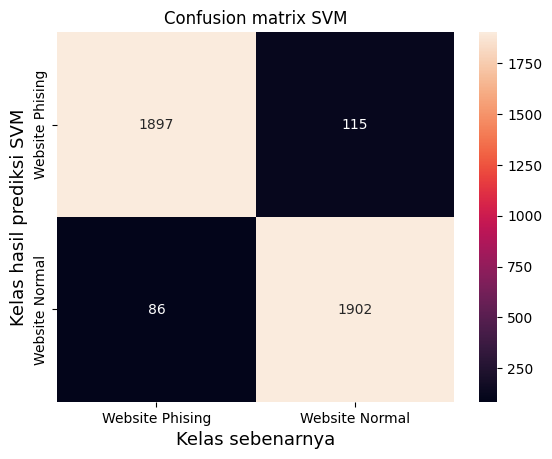

In [12]:
cm = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = kelas, yticklabels = kelas)
plt.ylabel('Kelas hasil prediksi SVM', fontsize = 13)
plt.xlabel('Kelas sebenarnya', fontsize = 13)
plt.title('Confusion matrix SVM')
plt.show()

In [13]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2012
           1       0.94      0.96      0.95      1988

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



# **ANN 60/40**

In [14]:
i = 0
header_written = False

while i < 100:
  # Parameter ANN
  iter = random.randint(1,500)
  lap_tersembunyi = random.randint(1,500)
  alpha = random.uniform(0.0001, 0.001)

  clf = MLPClassifier(max_iter = iter, activation='relu', alpha = alpha, hidden_layer_sizes = lap_tersembunyi).fit(X_train, y_train)
  clf.fit(X_train, y_train)
  y_pred_ann = clf.predict(X_test)

  accuracy_ANN = accuracy_score(y_test, y_pred_ann)
  precision_ANN = precision_score(y_test, y_pred_ann)
  recall_ANN = recall_score(y_test, y_pred_ann)
  f1_ANN = f1_score(y_test, y_pred_ann)

  metrics_dict = {
      'Accuracy': accuracy_ANN,
      'Precision': precision_ANN,
      'Recall': recall_ANN,
      'F1 Score': f1_ANN
  }

  metrics_df = pd.DataFrame([metrics_dict])

  if not header_written:
        metrics_df.to_csv('ann_60_40.csv', index=False)
        header_written = True
  else:
        metrics_df.to_csv('ann_60_40.csv', mode='a', header=False, index=False)

  print('Akurasi model dengan ANN : {1:0.4f}'.format(c, accuracy_score(y_test, y_pred_ann)))
  i+=1

Akurasi model dengan ANN : 0.9665
Akurasi model dengan ANN : 0.9613
Akurasi model dengan ANN : 0.9623


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (234) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9647
Akurasi model dengan ANN : 0.9657


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (218) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (218) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9590


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (104) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (104) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9640
Akurasi model dengan ANN : 0.9683
Akurasi model dengan ANN : 0.9613
Akurasi model dengan ANN : 0.9623
Akurasi model dengan ANN : 0.9590


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (203) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (203) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9653
Akurasi model dengan ANN : 0.9607
Akurasi model dengan ANN : 0.9577


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (134) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (134) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9630
Akurasi model dengan ANN : 0.9597


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (230) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9677
Akurasi model dengan ANN : 0.9660


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (126) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9580


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9480


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (29) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (29) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9585


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9570
Akurasi model dengan ANN : 0.9645
Akurasi model dengan ANN : 0.9623
Akurasi model dengan ANN : 0.9655
Akurasi model dengan ANN : 0.9617


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9463


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9513


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (129) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9623


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (227) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (227) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9577
Akurasi model dengan ANN : 0.9640


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (230) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (230) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9647
Akurasi model dengan ANN : 0.9647
Akurasi model dengan ANN : 0.9625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (169) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (169) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (208) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9610


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9587


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (62) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (62) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9547


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9557
Akurasi model dengan ANN : 0.9597
Akurasi model dengan ANN : 0.9603


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9500
Akurasi model dengan ANN : 0.9593
Akurasi model dengan ANN : 0.9680
Akurasi model dengan ANN : 0.9685
Akurasi model dengan ANN : 0.9663
Akurasi model dengan ANN : 0.9670
Akurasi model dengan ANN : 0.9633
Akurasi model dengan ANN : 0.9633


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9377


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9573
Akurasi model dengan ANN : 0.9667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (185) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (185) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9660
Akurasi model dengan ANN : 0.9645


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (92) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (92) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9593


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9550
Akurasi model dengan ANN : 0.9623


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (204) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (204) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9580
Akurasi model dengan ANN : 0.9635
Akurasi model dengan ANN : 0.9633


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (208) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9595


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (168) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (168) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9600
Akurasi model dengan ANN : 0.9692
Akurasi model dengan ANN : 0.9673


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9620


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (22) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (22) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9535


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (229) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9710


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (23) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (23) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9465


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (107) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (107) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9523


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (114) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (114) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9640
Akurasi model dengan ANN : 0.9677
Akurasi model dengan ANN : 0.9520
Akurasi model dengan ANN : 0.9702


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (156) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (156) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9623


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (290) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9680


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (14) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (14) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9480
Akurasi model dengan ANN : 0.9647


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (197) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9620
Akurasi model dengan ANN : 0.9635


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9547


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (162) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (162) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9597


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (189) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (189) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9657
Akurasi model dengan ANN : 0.9410
Akurasi model dengan ANN : 0.9647


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9625
Akurasi model dengan ANN : 0.9667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9345


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (133) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (133) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9620


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9520


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9257


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (149) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (149) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9575
Akurasi model dengan ANN : 0.9660
Akurasi model dengan ANN : 0.9660


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (189) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9540


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9550


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (244) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9620


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (283) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (283) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9645


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9533


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (167) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (167) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9645
Akurasi model dengan ANN : 0.9685


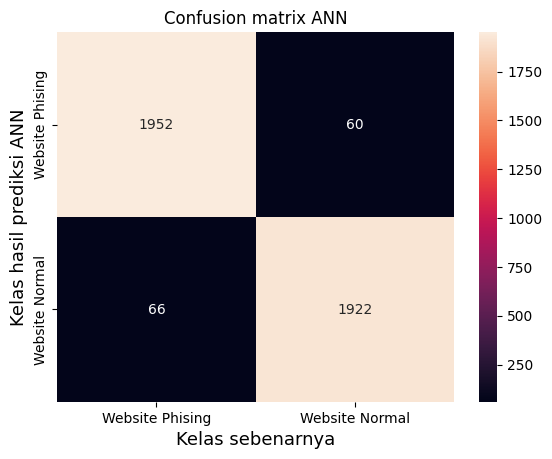

In [15]:
cm = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = kelas, yticklabels = kelas)
plt.ylabel('Kelas hasil prediksi ANN', fontsize = 13)
plt.xlabel('Kelas sebenarnya', fontsize = 13)
plt.title('Confusion matrix ANN')
plt.show()

In [16]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2012
           1       0.97      0.97      0.97      1988

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



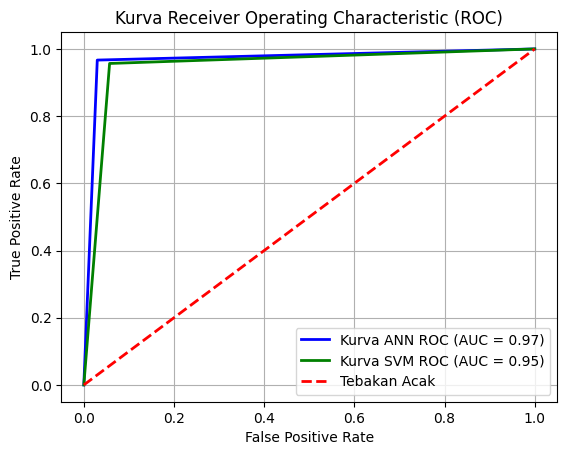

In [17]:
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)
auc_ann = roc_auc_score(y_test, y_pred_ann)

plt.plot(fpr_ann, tpr_ann, color='blue', lw=2, label='Kurva ANN ROC (AUC = %0.2f)' % auc_ann)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_SVM)
auc_svm = roc_auc_score(y_test, y_pred_SVM)

plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='Kurva SVM ROC (AUC = %0.2f)' % auc_svm)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Tebakan Acak')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

# **SVM 80/20**

In [19]:
i = 0
header_written = False

while i < 100:
  # Parameter SVM
  c = random.randint(1,200)
  derajat = random.randint(3,5)
  coef = random.randint(0,4)
  epsil = random.uniform(0.1, 1)

  svc = SVC(kernel = 'poly', C = c, coef0 = coef, degree = derajat)
  svc.fit(X_train, y_train)
  y_pred_SVM = svc.predict(X_test)

  accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
  precision_SVM = precision_score(y_test, y_pred_SVM)
  recall_SVM = recall_score(y_test, y_pred_SVM)
  f1_SVM = f1_score(y_test, y_pred_SVM)

  metrics_dict = {
      'Accuracy': accuracy_SVM,
      'Precision': precision_SVM,
      'Recall': recall_SVM,
      'F1 Score': f1_SVM
  }

  metrics_df = pd.DataFrame([metrics_dict])

  if not header_written:
        metrics_df.to_csv('svm_80_20.csv', index=False)
        header_written = True
  else:
        metrics_df.to_csv('svm_80_20.csv', mode='a', header=False, index=False)

  print('Akurasi model dengan kernel Polinomial dan C = {0} : {1:0.4f}'.format(c, accuracy_score(y_test, y_pred_SVM)))
  i+=1

Akurasi model dengan kernel Polinomial dan C = 4 : 0.9410
Akurasi model dengan kernel Polinomial dan C = 136 : 0.9620
Akurasi model dengan kernel Polinomial dan C = 181 : 0.9575
Akurasi model dengan kernel Polinomial dan C = 155 : 0.9595
Akurasi model dengan kernel Polinomial dan C = 73 : 0.9615
Akurasi model dengan kernel Polinomial dan C = 37 : 0.9255
Akurasi model dengan kernel Polinomial dan C = 87 : 0.9630
Akurasi model dengan kernel Polinomial dan C = 38 : 0.8825
Akurasi model dengan kernel Polinomial dan C = 146 : 0.9635
Akurasi model dengan kernel Polinomial dan C = 177 : 0.9650
Akurasi model dengan kernel Polinomial dan C = 69 : 0.9610
Akurasi model dengan kernel Polinomial dan C = 77 : 0.9610
Akurasi model dengan kernel Polinomial dan C = 117 : 0.9620
Akurasi model dengan kernel Polinomial dan C = 193 : 0.9440
Akurasi model dengan kernel Polinomial dan C = 89 : 0.9525
Akurasi model dengan kernel Polinomial dan C = 49 : 0.9590
Akurasi model dengan kernel Polinomial dan C = 48 

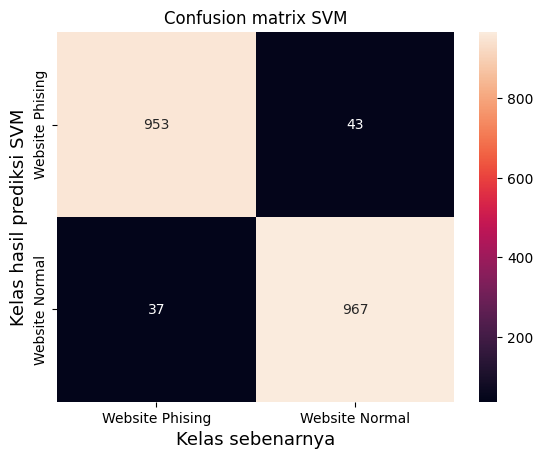

In [20]:
cm = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = kelas, yticklabels = kelas)
plt.ylabel('Kelas hasil prediksi SVM', fontsize = 13)
plt.xlabel('Kelas sebenarnya', fontsize = 13)
plt.title('Confusion matrix SVM')
plt.show()

In [21]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       996
           1       0.96      0.96      0.96      1004

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



# **ANN 80/20**

In [22]:
i = 0
header_written = False

while i < 100:
  # Parameter ANN
  iter = random.randint(1,500)
  lap_tersembunyi = random.randint(1,500)
  alpha = random.uniform(0.0001, 0.001)

  clf = MLPClassifier(max_iter = iter, activation='relu', alpha = alpha, hidden_layer_sizes = lap_tersembunyi).fit(X_train, y_train)
  clf.fit(X_train, y_train)
  y_pred_ann = clf.predict(X_test)

  accuracy_ANN = accuracy_score(y_test, y_pred_ann)
  precision_ANN = precision_score(y_test, y_pred_ann)
  recall_ANN = recall_score(y_test, y_pred_ann)
  f1_ANN = f1_score(y_test, y_pred_ann)

  metrics_dict = {
      'Accuracy': accuracy_ANN,
      'Precision': precision_ANN,
      'Recall': recall_ANN,
      'F1 Score': f1_ANN
  }

  metrics_df = pd.DataFrame([metrics_dict])

  if not header_written:
        metrics_df.to_csv('ann_80_20.csv', index=False)
        header_written = True
  else:
        metrics_df.to_csv('ann_80_20.csv', mode='a', header=False, index=False)

  print('Akurasi model dengan ANN : {1:0.4f}'.format(c, accuracy_score(y_test, y_pred_ann)))
  i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (99) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (99) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9510


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9380


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (251) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9645


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (72) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (72) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9590


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (148) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (148) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9575
Akurasi model dengan ANN : 0.9670


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (132) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (132) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9640
Akurasi model dengan ANN : 0.9635
Akurasi model dengan ANN : 0.9630
Akurasi model dengan ANN : 0.9670


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (267) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9660


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9665
Akurasi model dengan ANN : 0.9665


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9545
Akurasi model dengan ANN : 0.9605
Akurasi model dengan ANN : 0.9670


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (124) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (124) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9640


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (95) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (95) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9615


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (45) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (45) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9270


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9410
Akurasi model dengan ANN : 0.9685


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9685


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.8685


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9585
Akurasi model dengan ANN : 0.9605


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (164) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9675
Akurasi model dengan ANN : 0.9485


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9600


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (58) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (58) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9575


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9655


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9545
Akurasi model dengan ANN : 0.9650
Akurasi model dengan ANN : 0.9735
Akurasi model dengan ANN : 0.9660
Akurasi model dengan ANN : 0.9690
Akurasi model dengan ANN : 0.9705


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9460


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (147) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (147) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9650
Akurasi model dengan ANN : 0.9615


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (186) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (186) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9610
Akurasi model dengan ANN : 0.9590


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (108) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (108) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9650


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9570
Akurasi model dengan ANN : 0.9710


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (119) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (119) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9640
Akurasi model dengan ANN : 0.9720


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (96) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (96) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9600
Akurasi model dengan ANN : 0.9690


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (138) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (138) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9560
Akurasi model dengan ANN : 0.9625
Akurasi model dengan ANN : 0.9710


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9635
Akurasi model dengan ANN : 0.9605


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (97) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (97) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (168) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (168) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9590
Akurasi model dengan ANN : 0.9670
Akurasi model dengan ANN : 0.9655


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (168) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (168) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9665
Akurasi model dengan ANN : 0.9600


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (192) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (192) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9680


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (77) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (77) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9575
Akurasi model dengan ANN : 0.9655


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (123) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (123) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9595


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9560
Akurasi model dengan ANN : 0.9750
Akurasi model dengan ANN : 0.9635


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (81) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (81) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9625
Akurasi model dengan ANN : 0.9690
Akurasi model dengan ANN : 0.9390


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9690
Akurasi model dengan ANN : 0.9605
Akurasi model dengan ANN : 0.9625
Akurasi model dengan ANN : 0.9670


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9655


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (74) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (74) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9610


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (212) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (212) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9685
Akurasi model dengan ANN : 0.9615


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (295) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9610
Akurasi model dengan ANN : 0.9675


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9650
Akurasi model dengan ANN : 0.9645


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (83) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (83) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9620
Akurasi model dengan ANN : 0.9700
Akurasi model dengan ANN : 0.9680
Akurasi model dengan ANN : 0.9600


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9505


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9570
Akurasi model dengan ANN : 0.9685


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (273) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9690


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (86) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (86) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9550


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (229) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9680


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9550
Akurasi model dengan ANN : 0.9620


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (92) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (92) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (238) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9680
Akurasi model dengan ANN : 0.9655
Akurasi model dengan ANN : 0.9590


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (199) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9680


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (211) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (229) reached and the optimization hasn't converged yet.
  warnings.warn(


Akurasi model dengan ANN : 0.9620


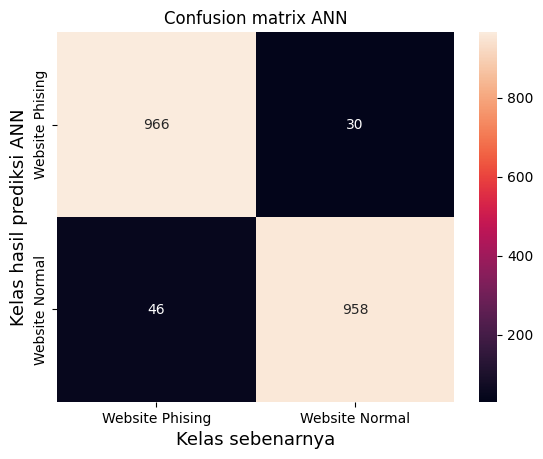

In [23]:
cm = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = kelas, yticklabels = kelas)
plt.ylabel('Kelas hasil prediksi ANN', fontsize = 13)
plt.xlabel('Kelas sebenarnya', fontsize = 13)
plt.title('Confusion matrix ANN')
plt.show()

In [24]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       996
           1       0.97      0.95      0.96      1004

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



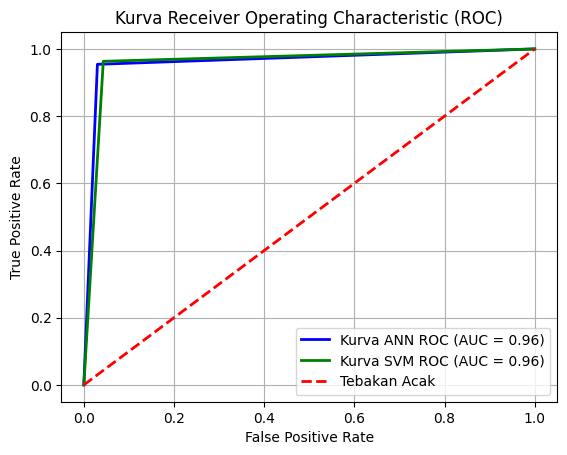

In [25]:
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)
auc_ann = roc_auc_score(y_test, y_pred_ann)

plt.plot(fpr_ann, tpr_ann, color='blue', lw=2, label='Kurva ANN ROC (AUC = %0.2f)' % auc_ann)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_SVM)
auc_svm = roc_auc_score(y_test, y_pred_SVM)

plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='Kurva SVM ROC (AUC = %0.2f)' % auc_svm)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Tebakan Acak')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **Visualisasi Data**

In [26]:
dfsvm6040 = pd.read_csv('svm_60_40.csv')
dfann6040 = pd.read_csv('ann_60_40.csv')
dfsvm8020 = pd.read_csv('svm_80_20.csv')
dfann8020 = pd.read_csv('ann_80_20.csv')

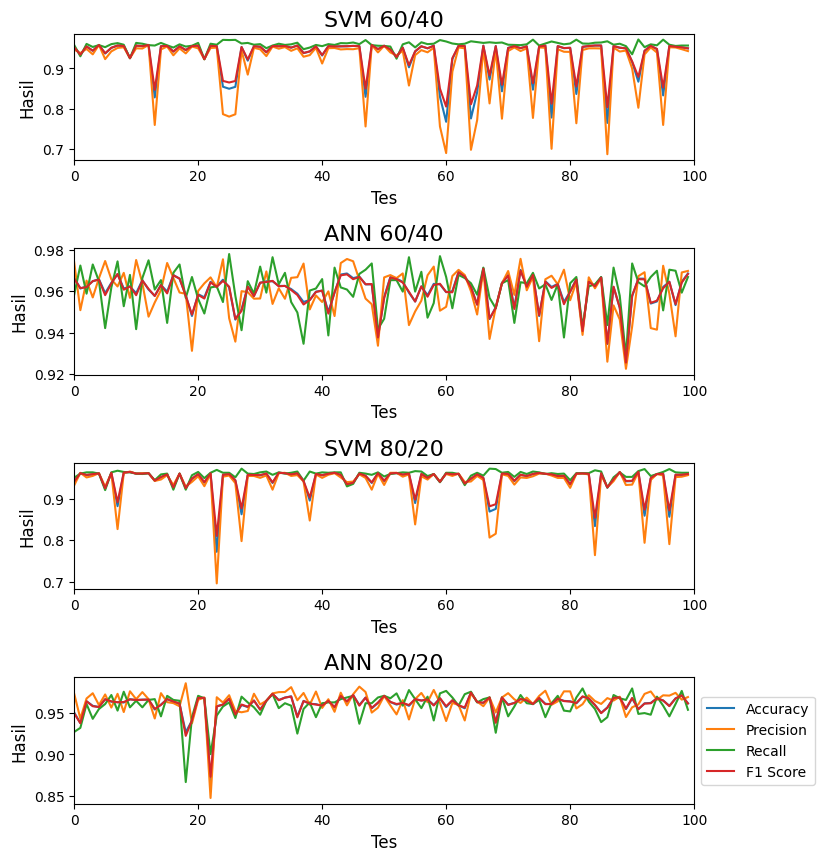

In [27]:
def line_plot(ax, df, title, ylim=None):
    ax.plot(df.index, df['Accuracy'], label='Accuracy')
    ax.plot(df.index, df['Precision'], label='Precision')
    ax.plot(df.index, df['Recall'], label='Recall')
    ax.plot(df.index, df['F1 Score'], label='F1 Score')

    if ylim is not None:
        ax.set_ylim(ylim)

    ax.set_title(title)

    handles, labels = ax.get_legend_handles_labels()
    return handles, labels


fig, axs = plt.subplots(4, 1, figsize=(8, 10))

line_plot(axs[0], dfsvm6040, 'SVM 60/40')
line_plot(axs[1], dfann6040, 'ANN 60/40')
line_plot(axs[2], dfsvm8020, 'SVM 80/20')
line_plot(axs[3], dfann8020, 'ANN 80/20')

for ax in axs:
    ax.set_xlabel('Tes', fontsize=12)
    ax.set_ylabel('Hasil', fontsize=12)
    ax.set_title(ax.get_title(), fontsize=16)

for ax in axs:
    ax.set_xlim(0, 100)

plt.subplots_adjust(hspace=0.7)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [28]:
avg_svm6040 = dfsvm6040.mean()
avg_ann6040 = dfann6040.mean()
avg_svm8020 = dfsvm8020.mean()
avg_ann8020 = dfann8020.mean()

print("Rata-rata SVM 60/40:")
print(avg_svm6040)
print("\nRata-rata for ANN 60/40:")
print(avg_ann6040)
print("\nRata-rata for SVM 80/20:")
print(avg_svm8020)
print("\nRata-rata for ANN 80/20:")
print(avg_ann8020)

Rata-rata SVM 60/40:
Accuracy     0.928772
Precision    0.910789
Recall       0.959004
F1 Score     0.932496
dtype: float64

Rata-rata for ANN 60/40:
Accuracy     0.960198
Precision    0.959286
Recall       0.960855
F1 Score     0.960002
dtype: float64

Rata-rata for SVM 80/20:
Accuracy     0.944940
Precision    0.936221
Recall       0.959143
F1 Score     0.946756
dtype: float64

Rata-rata for ANN 80/20:
Accuracy     0.961260
Precision    0.963977
Recall       0.958904
F1 Score     0.961313
dtype: float64
